In [6]:
import sys
sys.path.append("../")
from IPython.display import display, Math
import os
import scipy as sci
import numpy as np
import matrix_handler as mx
from solvers_lab5 import Landweber
from solvers_lab5 import Jacobi_iterative
from solvers_lab5 import Gauss_Seidel_iterative
from solvers_lab5 import SOR_method
from solvers_lab5 import SD_method
from solvers_lab5 import Kaczmarz_algorithm
from solvers_lab5 import Grand_Solverr

import matplotlib.pyplot as plt

zadania = "zadania"

In [7]:
A = np.loadtxt(os.path.join(zadania, "zad1_A.txt") , float, delimiter=" ", ndmin=2)
b = np.loadtxt(os.path.join(zadania, "zad1_b.txt"), float, delimiter=" ", ndmin=1)
xe = np.loadtxt(os.path.join(zadania, "zad1_xe.txt"), float, delimiter=" ", ndmin=1)

x0 = np.array([0, 0, 0, 0])

xLandweber, graphLandweber = Landweber(A, b, x0)
xJacobi, graphJacobi = Jacobi_iterative(A, b, x0)
xGauss_Seidel, graphGaussSeidel = Gauss_Seidel_iterative(A, b, x0)
xSOR, graphSOR = SOR_method(A, b, x0, omega=0.45) # We should calculate appropriate omega
xSD, graphSD = SD_method(A, b, x0)
xKaczmarz, graphKaczmarz = Kaczmarz_algorithm(A, b, x0)

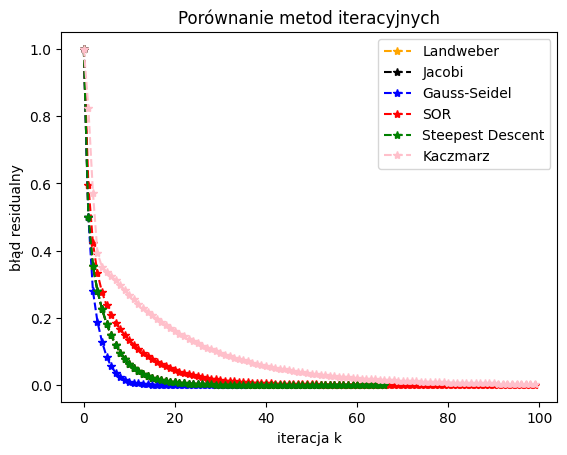

In [8]:
fig, ax = plt.subplots()

plt.figure(1)
ax.plot(graphLandweber[0], graphLandweber[1], marker="*", linestyle="--",  c="orange", label="Landweber")
ax.plot(graphJacobi[0], graphJacobi[1], marker="*", linestyle="--", c="black", label="Jacobi")
ax.plot(graphGaussSeidel[0], graphGaussSeidel[1], marker="*", linestyle="--",  c="blue", label="Gauss-Seidel")
ax.plot(graphSOR[0], graphSOR[1], marker="*", linestyle="--", c="red", label="SOR")
ax.plot(graphSD[0], graphSD[1], marker="*", linestyle="--", c="green", label="Steepest Descent")
ax.plot(graphKaczmarz[0], graphKaczmarz[1], marker="*", linestyle="--", c="pink", label="Kaczmarz")

plt.title("Porównanie metod iteracyjnych")
plt.ylabel("błąd residualny")
plt.xlabel("iteracja k")
plt.legend(loc="upper right")
plt.show()

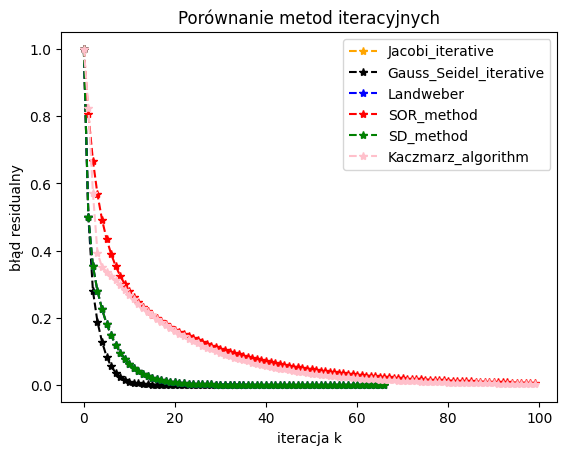

In [9]:
algorithmss = [Jacobi_iterative, Gauss_Seidel_iterative, Landweber, SOR_method, SD_method, Kaczmarz_algorithm]
x_sol, Graphy = Grand_Solverr(A, b, x0, xe, algorithmss)

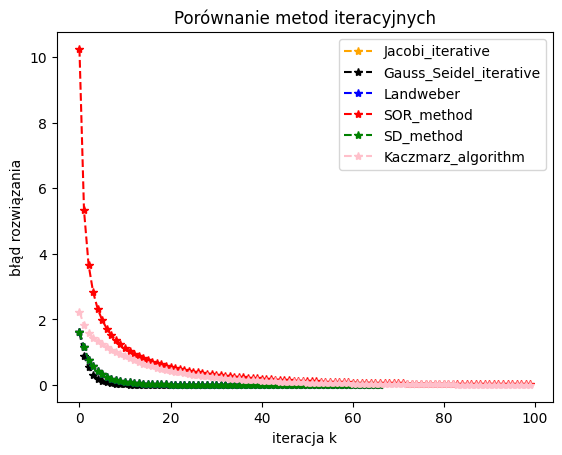

In [10]:
fig, ax = plt.subplots()
colors = ["orange", "black", "blue", "red", "green", "pink"]

for i in algorithmss:
    ax.plot(Graphy[algorithmss.index(i)][0], Graphy[algorithmss.index(i)][2], c=colors[algorithmss.index(i)], marker="*", label=str(i.__name__), linestyle="--")

plt.legend(loc="upper right")
plt.title("Porównanie metod iteracyjnych")
plt.ylabel("błąd rozwiązania")
plt.xlabel("iteracja k")
plt.show()